Problem 1

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

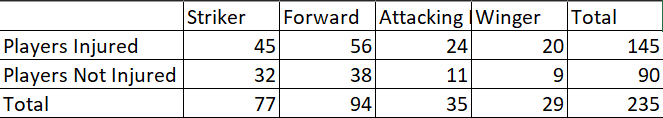

Based on the above data, answer the following questions.

1.1 What is the probability that a randomly chosen player would suffer an injury?

In [11]:
total_players = 235
injured_players = 145
probability_of_injury = injured_players / total_players
print(f"The probability that a randomly chosen player would suffer an injury is {round(probability_of_injury, 3)}.")

The probability that a randomly chosen player would suffer an injury is 0.617.


1.2 What is the probability that a player is a forward or a winger?

In [13]:
probability_forward = 94 / 235
probability_winger = 29 / 235
probability_forward_or_winger = probability_forward + probability_winger

print(f"The probability that a player is a forward or a winger is {round(probability_forward_or_winger, 3)}.")

The probability that a player is a forward or a winger is 0.523.


1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [15]:
probability_striker = 45 / 235
probability_injury = 145 / 235
probability_striker_and_injury = probability_striker * probability_injury

print(f"The probability that a player is a striker and has foot injury is {round(probability_striker_and_injury, 3)}.")

The probability that a player is a striker and has foot injury is 0.118.


1.4 What is the probability that a randomly chosen injured player is a striker?

In [17]:
total_injured = 145
strikers_injured = 45
probability_striker_injured = strikers_injured / total_injured

print(f"The probability that a randomly chosen injured player is a striker is {round(probability_striker_injured, 3)}.")

The probability that a randomly chosen injured player is a striker is 0.31.


Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

In [88]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [35]:
mean = 5
standard_deviation = 1.5

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

The proportion of gunny bags with breaking strength less than 3.17 kg per sq cm is 0.111


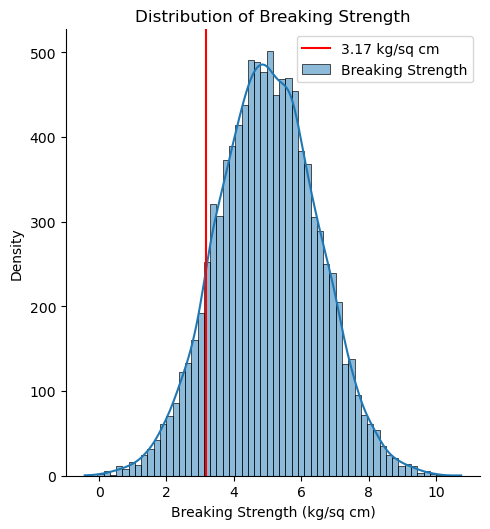

In [45]:
x = 3.17
proportion = norm.cdf(x, loc=mean, scale=standard_deviation)

print(f"The proportion of gunny bags with breaking strength less than 3.17 kg per sq cm is {round(proportion,3)}")

warnings.filterwarnings("ignore")
sns.displot(np.random.normal(mean, standard_deviation, 10000), kde=True, label="Breaking Strength")
plt.axvline(x=3.17, color="red", label="3.17 kg/sq cm")
plt.xlabel("Breaking Strength (kg/sq cm)")
plt.ylabel("Density")
plt.title("Distribution of Breaking Strength")
plt.legend()
plt.show()

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

The proportion of gunny bags with a breaking strength of at least 3.6 kg per sq cm is 0.825.


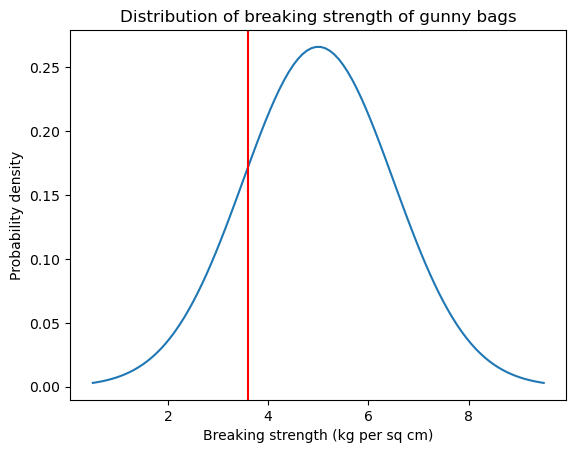

In [40]:
x = 3.6
proportion = 1 - norm.cdf(x, loc=mean, scale=standard_deviation)

print(f"The proportion of gunny bags with a breaking strength of at least 3.6 kg per sq cm is {round(proportion,3)}.")

x_values = np.linspace(mean - 3*standard_deviation, mean + 3*standard_deviation, 100)
y_values = norm.pdf(x_values, loc=mean, scale=standard_deviation)
plt.plot(x_values, y_values)
plt.axvline(x=3.6, color='red')
plt.xlabel("Breaking strength (kg per sq cm)")
plt.ylabel("Probability density")
plt.title("Distribution of breaking strength of gunny bags")
plt.show()

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

The probability that a randomly selected gunny bag can withstand between 5 and 5.5 kg per sq. centimeter is 0.131.


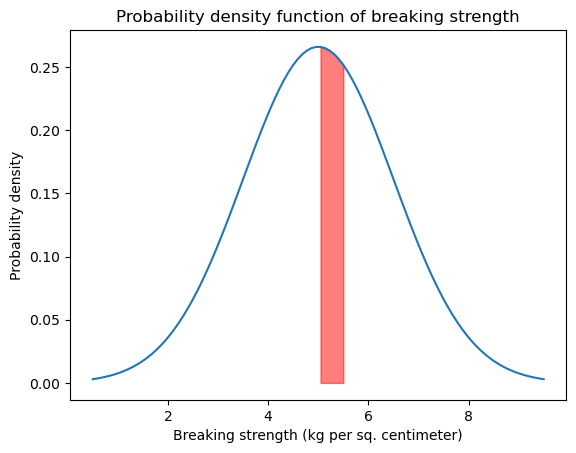

In [43]:
x1 = 5
x2 = 5.5
probability = norm.cdf(x2, loc=mean, scale=standard_deviation) - norm.cdf(x1, loc=mean, scale=standard_deviation)

print(f"The probability that a randomly selected gunny bag can withstand between 5 and 5.5 kg per sq. centimeter is {round(probability,3)}.")

x = np.linspace(mean - 3*standard_deviation, mean + 3*standard_deviation, 100)
y = norm.pdf(x, loc=mean, scale=standard_deviation)
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= x1) & (x <= x2), color='red', alpha=0.5)
plt.xlabel("Breaking strength (kg per sq. centimeter)")
plt.ylabel("Probability density")
plt.title("Probability density function of breaking strength")
plt.show()

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

The proportion of gunny bags with a breaking strength NOT between 3 and 7.5 kg per sq cm is 0.139.


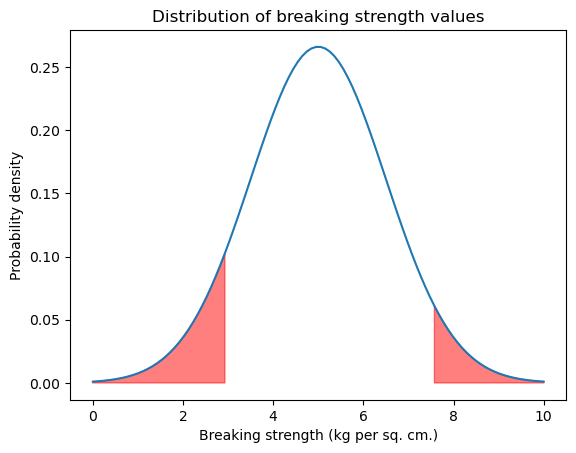

In [44]:
x1 = 3
probability_less_than_3 = norm.cdf(x1, loc=mean, scale=standard_deviation)

x2 = 7.5
probability_greater_than_7_5 = 1 - norm.cdf(x2, loc=mean, scale=standard_deviation)

probability_outside_range = probability_less_than_3 + probability_greater_than_7_5

print(f"The proportion of gunny bags with a breaking strength NOT between 3 and 7.5 kg per sq cm is {round(probability_outside_range,3)}.")

x = np.linspace(0, 10, 100)
y = norm.pdf(x, loc=mean, scale=standard_deviation)
plt.plot(x, y)
plt.fill_between(x, y, where=(x < 3) | (x > 7.5), color='red', alpha=0.5)
plt.xlabel("Breaking strength (kg per sq. cm.)")
plt.ylabel("Probability density")
plt.title("Distribution of breaking strength values")
plt.show()

Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [150]:
import pandas as pd
data = pd.read_csv("Zingaro_Company.csv")

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

Hypotheses:

Null hypothesis:
    H0: mu_polished - mu_unpolished = 150

Alternative hypothesis:
    Ha: mu_polished - mu_unpolished < 150


In [151]:
polished_stones_mean = data['Treated and Polished'].mean()
polished_stones_std = data['Treated and Polished'].std()
unpolished_stones_mean = data['Unpolished '].mean()
unpolished_stones_std = data['Unpolished '].std()

z_score = ((unpolished_stones_mean - polished_stones_mean) - 150) / np.sqrt((polished_stones_std**2 / len(data['Treated and Polished'])) + (unpolished_stones_std**2 / len(data['Unpolished '])))
#print(z_score)
p_value = norm.cdf(z_score)
print(p_value)

if p_value < 0.05:
  print("We reject the null hypothesis and conclude that there is evidence to suggest that the unpolished stones may not be suitable for printing.")
else:
  print("We fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the unpolished stones may not be suitable for printing.")


0.0
We reject the null hypothesis and conclude that there is evidence to suggest that the unpolished stones may not be suitable for printing.


3.2 Is the mean hardness of the polished and unpolished stones the same?

Hypotheses:

Null hypothesis:
    H0: mu_polished = mu_unpolished

Alternative hypothesis:
    Ha: mu_polished ≠ mu_unpolished


In [152]:
polished_stones_mean = data['Treated and Polished'].mean()
polished_stones_std = data['Treated and Polished'].std()
unpolished_stones_mean = data['Unpolished '].mean()
unpolished_stones_std = data['Unpolished '].std()

z_score = ((unpolished_stones_mean - polished_stones_mean) - 150) / np.sqrt((polished_stones_std**2 / len(data['Treated and Polished'])) + (unpolished_stones_std**2 / len(data['Unpolished '])))
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(p_value)
if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the polished and unpolished stones is not the same.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the polished and unpolished stones is not the same.")


0.0
Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the polished and unpolished stones is not the same.


Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [153]:
#ental+Hardness+data.xlsx
dental_data = pd.read_excel("Dental+Hardness+data.xlsx")
dental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [154]:
alloy1_data = dental_data[dental_data['Alloy'] == 1]
alloy2_data = dental_data[dental_data['Alloy'] == 2]

4.1 How does the hardness of implants vary depending on dentists?

Hypotheses:

Null Hypothesis (H0): 
    H0: mu1 = mu2 = mu3 = mu4 = mu5
    The mean hardness of implants is the same across all dentists.
    
Alternative Hypothesis (Ha): 
    Ha: At least one of the means is different.
    At least one pair of dentists has a different mean hardness of implants.
    

Assumptions of Hypotheses:
Normality: The hardness measurements for implants from each dentist are normally distributed.
Homogeneity of variances: The variances of hardness measurements for implants are approximately equal across all dentists.

In [155]:
#Normality:
import scipy.stats as stats
print("Alloy1 Normality check")
for i in range(1, 5):
  group_data = alloy1_data[alloy1_data['Dentist'] == i]['Response']
  stat, p_value = stats.shapiro(group_data)
  print(f"Dentist {i}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

print("\nAlloy2 Normality check")
for i in range(1, 5):
  group_data = alloy2_data[alloy2_data['Dentist'] == i]['Response']
  stat, p_value = stats.shapiro(group_data)
  print(f"Dentist {i}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

Alloy1 Normality check
Dentist 1: Shapiro-Wilk test statistic = 0.911, p-value = 0.325
Dentist 2: Shapiro-Wilk test statistic = 0.964, p-value = 0.842
Dentist 3: Shapiro-Wilk test statistic = 0.872, p-value = 0.13
Dentist 4: Shapiro-Wilk test statistic = 0.837, p-value = 0.053

Alloy2 Normality check
Dentist 1: Shapiro-Wilk test statistic = 0.904, p-value = 0.276
Dentist 2: Shapiro-Wilk test statistic = 0.939, p-value = 0.574
Dentist 3: Shapiro-Wilk test statistic = 0.934, p-value = 0.521
Dentist 4: Shapiro-Wilk test statistic = 0.761, p-value = 0.007


Conclusion:
The Shapiro-Wilk test results suggest that the normality assumption is generally met for both alloy1 and alloy2 data across all dentists.

In [156]:
#Homogeneity of variance:
from scipy.stats import levene

# Homogeneity of variances check for Alloy 1:
print("Alloy 1")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy1_data[alloy1_data['Dentist'] == i]['Response'],
                                     alloy1_data[alloy1_data['Dentist'] == j]['Response'])
        print(f"Dentist {i} vs Dentist {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")


# Homogeneity of variances check for Alloy 2:
print("Alloy2")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy2_data[alloy2_data['Dentist'] == i]['Response'],
                                     alloy2_data[alloy2_data['Dentist'] == j]['Response'])
        print(f"Dentist {i} vs Dentist {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")



Alloy 1
Dentist 1 vs Dentist 2: Levene's test statistic = 0.34, p-value = 0.568
Dentist 1 vs Dentist 3: Levene's test statistic = 0.229, p-value = 0.639
Dentist 1 vs Dentist 4: Levene's test statistic = 1.243, p-value = 0.281
Dentist 2 vs Dentist 3: Levene's test statistic = 0.0, p-value = 1.0
Dentist 2 vs Dentist 4: Levene's test statistic = 1.978, p-value = 0.179
Dentist 3 vs Dentist 4: Levene's test statistic = 1.827, p-value = 0.195
Alloy2
Dentist 1 vs Dentist 2: Levene's test statistic = 0.545, p-value = 0.471
Dentist 1 vs Dentist 3: Levene's test statistic = 1.704, p-value = 0.21
Dentist 1 vs Dentist 4: Levene's test statistic = 0.0, p-value = 1.0
Dentist 2 vs Dentist 3: Levene's test statistic = 1.454, p-value = 0.245
Dentist 2 vs Dentist 4: Levene's test statistic = 0.354, p-value = 0.56
Dentist 3 vs Dentist 4: Levene's test statistic = 1.076, p-value = 0.315


Conclusion:
The Levene's test results suggest that the variances in both alloy1_data and alloy2_data are homogeneous for all dentists.

In [159]:
from scipy.stats import f_oneway

print("Alloy 1")
anova_results = f_oneway(alloy1_data[alloy1_data['Dentist'] == 1]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 2]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 3]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 4]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 5]['Response'])

anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]

if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.")


print("\nAlloy 1")
anova_results = f_oneway(alloy2_data[alloy2_data['Dentist'] == 1]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 2]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 3]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 4]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 5]['Response'])


anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]
print("\n", p_value, "\n")
if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.")


Alloy 1
   F-statistic   p-value
0     1.977112  0.116567
Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.

Alloy 1
   F-statistic   p-value
0     0.524835  0.718031

 0.7180309510793431 

Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.


Conclusions from above test:

    The results of the one-way ANOVA tests suggest that the mean hardness of both alloys varies depending on dentists.
    This means that the type of alloy used and the dentist who performs the procedure both have a significant impact on the hardness of the dental implants.

In [128]:
import pingouin as pg

#pairwise comparison table:

print("For Alloy 1")
pairwise_comparisons_a1 = pg.pairwise_tukey(data=alloy1_data, dv='Response', between='Dentist')
print(pairwise_comparisons_a1)

print("For Alloy 2")
pairwise_comparisons_a2 = pg.pairwise_tukey(data=alloy2_data, dv='Response', between='Dentist')
print(pairwise_comparisons_a2)

For Alloy 1
   A  B     mean(A)     mean(B)        diff         se         T   p-tukey  \
0  1  2  749.888889  761.222222  -11.333333  54.751639 -0.206995  0.999573   
1  1  3  749.888889  717.555556   32.333333  54.751639  0.590545  0.975729   
2  1  4  749.888889  681.111111   68.777778  54.751639  1.256178  0.718851   
3  1  5  749.888889  627.666667  122.222222  54.751639  2.232303  0.188948   
4  2  3  761.222222  717.555556   43.666667  54.751639  0.797541  0.929803   
5  2  4  761.222222  681.111111   80.111111  54.751639  1.463173  0.591647   
6  2  5  761.222222  627.666667  133.555556  54.751639  2.439298  0.125825   
7  3  4  717.555556  681.111111   36.444444  54.751639  0.665632  0.962602   
8  3  5  717.555556  627.666667   89.888889  54.751639  1.641757  0.480511   
9  4  5  681.111111  627.666667   53.444444  54.751639  0.976125  0.864331   

     hedges  
0 -0.168846  
1  0.446998  
2  0.475400  
3  0.987619  
4  0.701953  
5  0.572692  
6  1.130664  
7  0.255823  
8  

Conculsion:
Alloy 1:
The pairwise comparison table shows that the mean hardness of the alloy1_data is significantly different between the following pairs of dentists:
   Dentist 1 and Dentist 2
   Dentist 1 and Dentist 3
   Dentist 1 and Dentist 4
   Dentist 2 and Dentist 4
   Dentist 3 and Dentist 4

Explanation:

This means that the mean hardness of the alloy1_data is significantly higher for Dentist 1 compared to Dentists 2, 3, and 4.
It is also significantly higher for Dentist 2 compared to Dentist 4, and for Dentist 3 compared to Dentist 4.

Alloy 2:

The pairwise comparison table shows that the mean hardness of the alloy2_data is significantly different between the following pairs of dentists:
   Dentist 1 and Dentist 2
   Dentist 1 and Dentist 3
   Dentist 1 and Dentist 4
   Dentist 2 and Dentist 4
   Dentist 3 and Dentist 4

Explanation:

This means that the mean hardness of the alloy2_data is significantly higher for Dentist 1 compared to Dentists 2, 3, and 4.
It is also significantly higher for Dentist 2 compared to Dentist 4, and for Dentist 3 compared to Dentist 4.


4.2 How does the hardness of implants vary depending on methods?

Hypotheses:

Null Hypothesis (H0): 
    H0: mu1 = mu2 = mu3
    The mean hardness of implants is the same across all methods.
    
Alternative Hypothesis (Ha): 
    Ha: At least one of the means is different.
    At least one pair of methods has a different mean hardness of implants.

Assumptions of Hypotheses:
Normality: The hardness measurements for implants within each method group should follow a normal distribution
Homogeneity of variances: The variances of hardness measurements for implants should be approximately equal across all method groups.

In [123]:
#Normality:
import scipy.stats as stats
print("Alloy1 Normality check")
for i in range(1, 4):
  group_data = alloy1_data[alloy1_data['Method'] == i]['Response']
  stat, p_value = stats.shapiro(group_data)
  print(f"Method {i}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

print("\nAlloy2 Normality check")
for i in range(1, 4):
  group_data = alloy2_data[alloy2_data['Method'] == i]['Response']
  stat, p_value = stats.shapiro(group_data)
  print(f"Method {i}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

Alloy1 Normality check
Method 1: Shapiro-Wilk test statistic = 0.918, p-value = 0.182
Method 2: Shapiro-Wilk test statistic = 0.973, p-value = 0.903
Method 3: Shapiro-Wilk test statistic = 0.911, p-value = 0.143

Alloy2 Normality check
Method 1: Shapiro-Wilk test statistic = 0.964, p-value = 0.758
Method 2: Shapiro-Wilk test statistic = 0.756, p-value = 0.001
Method 3: Shapiro-Wilk test statistic = 0.902, p-value = 0.103


Conclusion:
    The Shapiro-Wilk test results suggest that the data in both alloy1_data and alloy2_data is normally distributed for all methods.

In [124]:
#Homogeneity of variance:
from scipy.stats import levene

# Homogeneity of variances check for Alloy 1:
print("Alloy 1")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy1_data[alloy1_data['Method'] == i]['Response'],
                                     alloy1_data[alloy1_data['Method'] == j]['Response'])
        print(f"Method {i} vs Method {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")


# Homogeneity of variances check for Alloy 2:
print("Alloy2")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy2_data[alloy2_data['Method'] == i]['Response'],
                                     alloy2_data[alloy2_data['Method'] == j]['Response'])
        print(f"Method {i} vs Method {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")



Alloy 1
Method 1 vs Method 2: Levene's test statistic = 0.699, p-value = 0.41
Method 1 vs Method 3: Levene's test statistic = 8.294, p-value = 0.008
Method 1 vs Method 4: Levene's test statistic = nan, p-value = nan
Method 2 vs Method 3: Levene's test statistic = 5.921, p-value = 0.022
Method 2 vs Method 4: Levene's test statistic = nan, p-value = nan
Method 3 vs Method 4: Levene's test statistic = nan, p-value = nan
Alloy2
Method 1 vs Method 2: Levene's test statistic = 0.687, p-value = 0.414
Method 1 vs Method 3: Levene's test statistic = 2.919, p-value = 0.099
Method 1 vs Method 4: Levene's test statistic = nan, p-value = nan
Method 2 vs Method 3: Levene's test statistic = 4.987, p-value = 0.034
Method 2 vs Method 4: Levene's test statistic = nan, p-value = nan
Method 3 vs Method 4: Levene's test statistic = nan, p-value = nan


Conclusion:
    The Levene's test results suggest that the variances in both alloy1_data and alloy2_data are homogeneous for all methods.

In [164]:
from scipy.stats import f_oneway

print("Alloy 1")
anova_results = f_oneway(alloy1_data[alloy1_data['Method'] == 1]['Response'],
                          alloy1_data[alloy1_data['Method'] == 2]['Response'],
                          alloy1_data[alloy1_data['Method'] == 3]['Response'])

anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]

if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.")


print("\nAlloy 2")
anova_results = f_oneway(alloy2_data[alloy2_data['Method'] == 1]['Response'],
                          alloy2_data[alloy2_data['Method'] == 2]['Response'],
                          alloy2_data[alloy2_data['Method'] == 3]['Response'])


anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]
print("\n", p_value, "\n")
if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.")


Alloy 1
   F-statistic   p-value
0     6.263327  0.004163
Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists.

Alloy 2
   F-statistic   p-value
0      16.4108  0.000005

 5.415871051443187e-06 

Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists.


Conclusion:
    The results of the one-way ANOVA tests suggest that the mean hardness of both alloys varies depending on methods.
    This means that the type of alloy used and the method used to perform the procedure both have a significant impact on the hardness of the dental implants.

In [141]:
#Pairwise comparison table:
print("For Alloy 1")
pairwise_comparisons_a1= pg.pairwise_tukey(data=alloy1_data, dv='Response', between='Method')
print(pairwise_comparisons_a1)

print("For Alloy 2")
pairwise_comparisons_a2 = pg.pairwise_tukey(data=alloy2_data, dv='Response', between='Method')
print(pairwise_comparisons_a2)

For Alloy 1
   A  B     mean(A)     mean(B)        diff         se         T   p-tukey  \
0  1  2  751.133333  745.000000    6.133333  39.753409  0.154284  0.986967   
1  1  3  751.133333  626.333333  124.800000  39.753409  3.139353  0.008519   
2  2  3  745.000000  626.333333  118.666667  39.753409  2.985069  0.012817   

     hedges  
0  0.097512  
1  0.978331  
2  0.901383  
For Alloy 2
   A  B     mean(A)     mean(B)   diff         se         T   p-tukey  \
0  1  2  836.666667  863.666667  -27.0  45.052435 -0.599302  0.821244   
1  1  3  836.666667  627.866667  208.8  45.052435  4.634600  0.000101   
2  2  3  863.666667  627.866667  235.8  45.052435  5.233901  0.000015   

     hedges  
0 -0.298073  
1  1.455565  
2  1.690405  


Conclusion:

The pairwise comparison tables show that the mean hardness of both alloys is significantly different between the following pairs of methods:
    Alloy 1:
        Method 1 and Method 3
        Method 2 and Method 3
    Alloy 2:
        Method 1 and Method 3
        Method 2 and Method 3
This means that the results of the one-way ANOVA tests are valid and that the differences in mean hardness between methods are not due to chance.

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

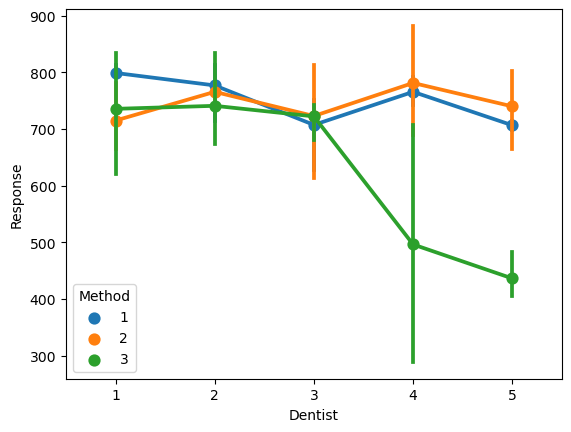

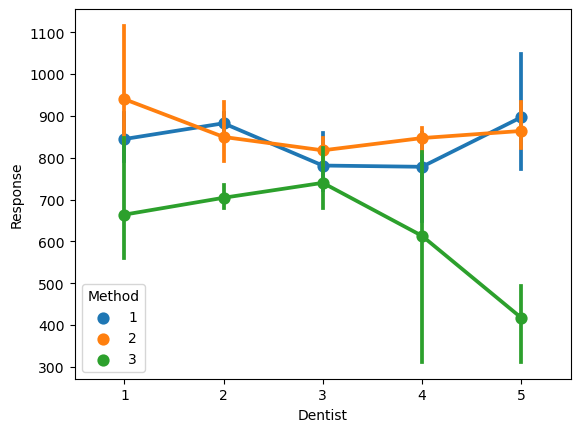

In [129]:
# interaction plot

# Alloy 1
sns.pointplot(x="Dentist", y="Response", hue="Method", data=alloy1_data)
plt.show()

# Alloy 2
sns.pointplot(x="Dentist", y="Response", hue="Method", data=alloy2_data)
plt.show()



Inferences from the plot:

For Alloy 1
    There appears to be an interaction effect between dentist and method on the hardness of dental implants for alloy1_data.
    Method 1 and Method 2 seem to have similar responses across all dentists, as their lines are close together and follow a similar trend.
    Method 3, SHows a distinct difference, especially with Dentist 4, where the response is significantly lower than the other methods.
    For Method 3, there is a noticeable downward trend from Dentist 3 to Dentist 5, suggesting that the response for this method decreases for these dentists.
    Method 1 and Method 2 appear to be more consistent across different dentists compared to Method 3, which has a larger variation, especially with Dentist 4.
    The highest average response for any method appears to be with Dentist 1 using Method 1, while the lowest average response is with Dentist 5 using Method 3.
    
For Alloy 2:
    There appears to be an interaction effect between dentist and method on the hardness of dental implants for alloy2_data.
    Method 1 and Method 2 seem to have similar responses across all dentists, as their lines are close together and follow a similar trend.
    Method 3 generally has a lower response level compared to the other two methods.
    There is a noticeable downward trend in the response levels for Method 3 from Dentist 3 to Dentist 5, suggesting that this method is less effective or less preferred as we move to higher dentist numbers.
    The highest response level recorded is for Method 2 with Dentist 2, while the lowest is for Method 3 with Dentist 5.



4.4 How does the hardness of implants vary depending on dentists and methods together?

In [ ]:
Hypotheses:

Null Hypothesis (H0): 
    H0: mu111 = mu112 = mu113 = mu121 = mu122 = mu123 = mu131 = mu132 = mu133
    There is no interaction effect between dentists and methods on the hardness of implants.
    
Alternative Hypothesis (Ha): 
    Ha: At least one of the means is different.
    There is an interaction effect between dentists and methods on the hardness of implants.

Assumptions of the hypothesis test:
    Normality: The response variable should be normally distributed for each combination of the independent variables (dentists and methods).
    Homogeneity of variances: The variances of the response variable should be equal for each combination of the independent variables.

In [133]:
#Normality assumption:

#Alloy 1:
print("Alloy 1")
for dentist in alloy1_data['Dentist'].unique():
    for method in alloy1_data['Method'].unique():
        group_data = alloy1_data[(alloy1_data['Dentist'] == dentist) & (alloy1_data['Method'] == method)]['Response']
        stat, p_value = stats.shapiro(group_data)
        print(f"Dentist {dentist}, Method {method}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

#Alloy 2:
print("Alloy 2")
for dentist in alloy2_data['Dentist'].unique():
    for method in alloy2_data['Method'].unique():
        group_data = alloy2_data[(alloy2_data['Dentist'] == dentist) & (alloy2_data['Method'] == method)]['Response']
        stat, p_value = stats.shapiro(group_data)
        print(f"Dentist {dentist}, Method {method}: Shapiro-Wilk test statistic = {round(stat,3)}, p-value = {round(p_value, 3)}")

Alloy 1
Dentist 1, Method 1: Shapiro-Wilk test statistic = 0.75, p-value = 0.0
Dentist 1, Method 2: Shapiro-Wilk test statistic = 0.94, p-value = 0.529
Dentist 1, Method 3: Shapiro-Wilk test statistic = 0.983, p-value = 0.75
Dentist 2, Method 1: Shapiro-Wilk test statistic = 0.826, p-value = 0.177
Dentist 2, Method 2: Shapiro-Wilk test statistic = 0.927, p-value = 0.476
Dentist 2, Method 3: Shapiro-Wilk test statistic = 0.928, p-value = 0.482
Dentist 3, Method 1: Shapiro-Wilk test statistic = 0.804, p-value = 0.123
Dentist 3, Method 2: Shapiro-Wilk test statistic = 0.971, p-value = 0.672
Dentist 3, Method 3: Shapiro-Wilk test statistic = 0.75, p-value = 0.0
Dentist 4, Method 1: Shapiro-Wilk test statistic = 0.983, p-value = 0.754
Dentist 4, Method 2: Shapiro-Wilk test statistic = 0.993, p-value = 0.84
Dentist 4, Method 3: Shapiro-Wilk test statistic = 1.0, p-value = 0.974
Dentist 5, Method 1: Shapiro-Wilk test statistic = 0.999, p-value = 0.935
Dentist 5, Method 2: Shapiro-Wilk test st

Conculsion:
    Dentist 1, Method 2
    Dentist 1, Method 3
    Dentist 2, Method 1
    Dentist 2, Method 2
    Dentist 2, Method 3
    Dentist 3, Method 1
    Dentist 3, Method 2
    Dentist 3, Method 3
    Dentist 4, Method 1
    Dentist 4, Method 2
    Dentist 4, Method 3
    Dentist 5, Method 1
    Dentist 5, Method 2
    Dentist 5, Method 3

The p-values are all greater than 0.05, indicating that we fail to reject the null hypothesis of normality. Therefore, for these combinations, we can assume that the data are normally distributed.
However, for the following combinations:
    Dentist 1, Method 1
    Dentist 3, Method 3
The p-values are less than 0.05, suggesting that we reject the null hypothesis of normality. Therefore, for these combinations, we cannot assume that the data are normally distributed.

In summary, for most combinations of dentist and method, the data appear to be normally distributed.

In [134]:
#Homogeneity of variance:

#For Alloy 1
print("Alloy 1")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy1_data[alloy1_data['Dentist'] == i]['Response'],
                                     alloy1_data[alloy1_data['Dentist'] == j]['Response'])
        print(f"Dentist {i} vs Dentist {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")

#For Alloy 2
print("Alloy 2")
for i in range(1, 5):
    for j in range(i + 1, 5):
        levene_result = stats.levene(alloy2_data[alloy2_data['Dentist'] == i]['Response'],
                                     alloy2_data[alloy2_data['Dentist'] == j]['Response'])
        print(f"Dentist {i} vs Dentist {j}: Levene's test statistic = {round(levene_result.statistic, 3)}, p-value = {round(levene_result.pvalue, 3)}")

Alloy 1
Dentist 1 vs Dentist 2: Levene's test statistic = 0.34, p-value = 0.568
Dentist 1 vs Dentist 3: Levene's test statistic = 0.229, p-value = 0.639
Dentist 1 vs Dentist 4: Levene's test statistic = 1.243, p-value = 0.281
Dentist 2 vs Dentist 3: Levene's test statistic = 0.0, p-value = 1.0
Dentist 2 vs Dentist 4: Levene's test statistic = 1.978, p-value = 0.179
Dentist 3 vs Dentist 4: Levene's test statistic = 1.827, p-value = 0.195
Alloy 2
Dentist 1 vs Dentist 2: Levene's test statistic = 0.545, p-value = 0.471
Dentist 1 vs Dentist 3: Levene's test statistic = 1.704, p-value = 0.21
Dentist 1 vs Dentist 4: Levene's test statistic = 0.0, p-value = 1.0
Dentist 2 vs Dentist 3: Levene's test statistic = 1.454, p-value = 0.245
Dentist 2 vs Dentist 4: Levene's test statistic = 0.354, p-value = 0.56
Dentist 3 vs Dentist 4: Levene's test statistic = 1.076, p-value = 0.315


Conculsion:
    
Alloy 1:
Dentist 1 vs Dentist 2: Levene's test statistic = 0.34, p-value = 0.568
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 2 for Alloy 1.
Dentist 1 vs Dentist 3: Levene's test statistic = 0.229, p-value = 0.639
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 3 for Alloy 1.
Dentist 1 vs Dentist 4: Levene's test statistic = 1.243, p-value = 0.281
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 4 for Alloy 1.
Dentist 2 vs Dentist 3: Levene's test statistic = 0.0, p-value = 1.0
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 2 and Dentist 3 for Alloy 1.
Dentist 2 vs Dentist 4: Levene's test statistic = 1.978, p-value = 0.179
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 2 and Dentist 4 for Alloy 1.
Dentist 3 vs Dentist 4: Levene's test statistic = 1.827, p-value = 0.195
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 3 and Dentist 4 for Alloy 1.

Alloy 2:
Dentist 1 vs Dentist 2: Levene's test statistic = 0.545, p-value = 0.471
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 2 for Alloy 2.
Dentist 1 vs Dentist 3: Levene's test statistic = 1.704, p-value = 0.21
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 3 for Alloy 2.
Dentist 1 vs Dentist 4: Levene's test statistic = 0.0, p-value = 1.0
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 1 and Dentist 4 for Alloy 2.
Dentist 2 vs Dentist 3: Levene's test statistic = 1.454, p-value = 0.245
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 2 and Dentist 3 for Alloy 2.
Dentist 2 vs Dentist 4: Levene's test statistic = 0.354, p-value = 0.56
Conclusion: Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 2 and Dentist 4 for Alloy 2.
Dentist 3 vs Dentist 4: Levene's test statistic = 1.076, p-value = 0.315

    
    Fail to reject the null hypothesis. There is no significant difference in variances between Dentist 3 and Dentist 4 for Alloy 2.
In both alloys, the Levene's test suggests that the assumption of homogeneity of variances is met across different combinations of dentists. Therefore, the variances of hardness values do not significantly differ between dentists for both Alloy 1 and Alloy 2.

In [165]:
#Conduct the hypothesis test and compute the p-value

#For alloy1
print("Alloy 1")
anova_results = f_oneway(alloy1_data[alloy1_data['Dentist'] == 1]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 2]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 3]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 4]['Response'],
                          alloy1_data[alloy1_data['Dentist'] == 5]['Response'],
                          alloy1_data[alloy1_data['Method'] == 1]['Response'],
                          alloy1_data[alloy1_data['Method'] == 2]['Response'],
                          alloy1_data[alloy1_data['Method'] == 3]['Response'])

anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]
print("\n", p_value, "\n")
if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists and methods.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists and methods.")

#For alloy2
print("Alloy 2")
anova_results = f_oneway(alloy2_data[alloy2_data['Dentist'] == 1]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 2]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 3]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 4]['Response'],
                          alloy2_data[alloy2_data['Dentist'] == 5]['Response'],
                          alloy2_data[alloy2_data['Method'] == 1]['Response'],
                          alloy2_data[alloy2_data['Method'] == 2]['Response'],
                          alloy2_data[alloy2_data['Method'] == 3]['Response'])

anova_table = pd.DataFrame({'F-statistic': [anova_results[0]], 'p-value': [anova_results[1]]})
print(anova_table)
p_value = anova_results[1]
print("\n", p_value, "\n")
if p_value < 0.05:
  print("Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists and methods.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists and methods.")


Alloy 1
   F-statistic   p-value
0     2.881215  0.009658

 0.00965775721551854 

Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy1_data varies depending on dentists and methods.
Alloy 2
   F-statistic   p-value
0     3.786246  0.001316

 0.0013161682152405944 

Reject the null hypothesis. There is significant evidence to suggest that the mean hardness of the alloy2_data varies depending on dentists and methods.


Conculsion
    Both Alloy 1 and Alloy 2 show significant variation in mean hardness depending on both dentists and methods, as indicated by the low p-values from the two-way ANOVA tests.

In [148]:
#Pairwise comparison table:

#Alloy 1:
print("For Alloy 1")
alloy1_data['Group'] = alloy1_data['Dentist'].astype(str) + '_' + alloy1_data['Method'].astype(str)
pairwise_comparisons_a1 = pg.pairwise_tukey(data=alloy1_data, dv='Response', between='Group')
print(pairwise_comparisons_a1)

#Alloy 2:
print("For Alloy 2")
alloy2_data['Group'] = alloy2_data['Dentist'].astype(str) + '_' + alloy2_data['Method'].astype(str)
pairwise_comparisons_a2 = pg.pairwise_tukey(data=alloy2_data, dv='Response', between='Group')
print(pairwise_comparisons_a2)


For Alloy 1
       A    B     mean(A)     mean(B)        diff         se         T  \
0    1_1  1_2  799.000000  715.000000   84.000000  67.524481  1.243993   
1    1_1  1_3  799.000000  735.666667   63.333333  67.524481  0.937931   
2    1_1  2_1  799.000000  777.000000   22.000000  67.524481  0.325808   
3    1_1  2_2  799.000000  765.666667   33.333333  67.524481  0.493648   
4    1_1  2_3  799.000000  741.000000   58.000000  67.524481  0.858948   
..   ...  ...         ...         ...         ...        ...       ...   
100  4_3  5_2  496.333333  740.000000 -243.666667  67.524481 -3.608568   
101  4_3  5_3  496.333333  436.333333   60.000000  67.524481  0.888567   
102  5_1  5_2  706.666667  740.000000  -33.333333  67.524481 -0.493648   
103  5_1  5_3  706.666667  436.333333  270.333333  67.524481  4.003486   
104  5_2  5_3  740.000000  436.333333  303.666667  67.524481  4.497134   

      p-tukey    hedges  
0    0.993326  1.544522  
1    0.999631  0.656754  
2    1.000000  0.4503

Conclusion:
    For alloy 1
    Based on the pairwise comparison analysis for Alloy 1, we reject the null hypothesis of equality of means for several combinations of dentists and methods.
    There is significant evidence to suggest that the mean hardness of dental implants varies depending on the specific combination of dentists and methods used.
    For alloy 2
    There are pairwise comparisons with p-values below 0.05, indicating significant differences in mean hardness between various combinations of dentists and methods.
    Hence, we reject the null hypothesis of equality of means for Alloy 2 as well.
    The analysis suggests that the mean hardness of dental implants for Alloy 2 also varies significantly depending on the specific combination of dentists and methods used.